In [79]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid
import math
import random
import scipy.optimize as opt

<h4>Deklaracje funkcji F i G i ich gradientów</h4>

In [80]:
def functionF(x: float):
    pi = np.pi
    return np.sin(pi*x) + np.power(x, 2)


def gradientF(x: float):
    pi = math.pi
    return pi*np.cos(pi*x) + 2*x


In [81]:
def functionG(x: tuple):
    e = np.e
    x1 = x[0]
    x2 = x[1]
    return 5*e**2 - 4*e*x1 + x1**2 + 2*e*x2 + x2**2;


def gradientG(x: tuple):
    e = np.e
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1 - 2*e), 2*(x2 + e)])

In [82]:
def get_minimum_f(): # For that point and step always finds minimum
    return opt.basinhopping(functionF, 0, minimizer_kwargs={"method": "BFGS"}, niter=200).x

def get_minimum_g(): # For that point and step always finds minimum
    return opt.basinhopping(functionG, [0, 0], minimizer_kwargs={"method": "BFGS"}, niter=200).x


def draw_f_plot(function, from_where = -20, to_where = 20):
    xf = np.linspace(from_where, to_where, 1000)
    yf = [function(x) for x in xf]
    plt.plot(xf, yf)

def draw_3d_plot(function,from_where = -20, to_where = 20):
    x1 = np.linspace(from_where, to_where, 1000)
    x2 = np.linspace(from_where, to_where, 1000)
    X1,X2 = meshgrid(x1, x2)
    figure = plt.figure()
    ax = plt.axes(projection='3d')
    yg = function((X1, X2))
    ax.plot_surface(X1, X2, yg, cmap='viridis', edgecolor='none')


In [83]:
def gradient_descent(starting_point: float, learning_rate: float, max_iterations: int, tolerance: float, function, gradientFn) -> float:
    x = np.array(starting_point)
    iterations = 0

    while iterations < max_iterations:
        gradient = gradientFn(x)
        step = learning_rate * gradient
        new_x = x - step

        func_diff = abs(function(new_x) - function(x))
        if (abs(gradient) < tolerance).all() and (func_diff < tolerance).all():
            return (x, iterations)

        x = new_x
        iterations += 1

    return (None, iterations)

<h4>Wykres funkcji F dla przedziału: <-20, 20></h4>

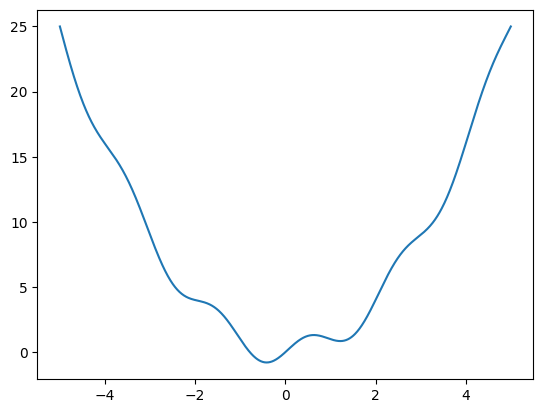

In [84]:
draw_f_plot(functionF, -5, 5)

Widać że funkcja F ma wiele minimów lokalnych, a jedno minimum globalne, więc jeśli podamy za duży skok to algorytm może przestrzelić minimum globalne i znaleźć minimum lokalne zamiast globalnego, odpowiednio za mały moze nie dojsc nawet do globalnego tylko zostanie na jakimś lokalnym jeśli będzie ono blisko punktu startowego.


<h4>Wykres funkcji G dla przedziału: <-20, 20></h4>

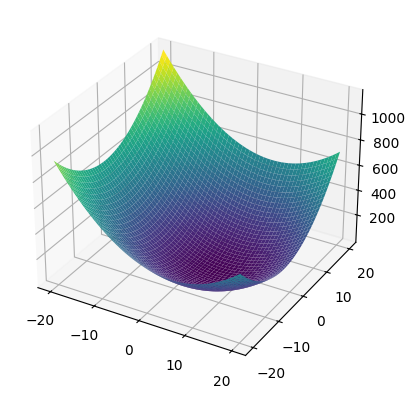

In [85]:
draw_3d_plot(functionG)

Funkcja G jest funkcja dwoch zmiennych co zwieksza jej koszt, ale ma tylko jedno minimum i jest to minimum globalne, wiec algorytm powinien dojsc do niego bez problemu.

<h5>Ostatecznie koszt optymalizacji aby uniknac konczenia spadku gradientu w minimum lokalnym a nie globalnym jest wiekszy niz sam koszt tego ze funkcja G jest funkcja 2 zmiennych. Wiec funkcja F jest trudniejsza do zoptymalizowania.</h5>

<h4>Minima globalne funkcji F i G: </h4>

In [86]:
print('Minimum globalne funkcji F:',get_minimum_f()[0])
print('Minimum globalne funkcji G:', get_minimum_g())

Minimum globalne funkcji F: -0.4149115951422106
Minimum globalne funkcji G: [ 5.43656365 -2.71828182]


In [87]:
import ipytest
ipytest.autoconfig()

In [88]:
%%ipytest

# compare if gradient descent finds the same minimum as basinhopping from scipy

def test_finding_minimum_F():
    assert round(gradient_descent(0, 0.1, 1000, 0.0001, functionF, gradientF)[0], 2) == round(get_minimum_f()[0], 2)

def test_finding_minimum_G():
    gradient = gradient_descent((0, 0), 0.1, 1000, 0.0001, functionG, gradientG)[0]
    assert round(gradient[0], 2) == round(get_minimum_g()[0], 2)
    assert round(gradient[1], 2) == round(get_minimum_g()[1], 2)


..                                                                                           [100%]
2 passed in 0.75s


<h3>Zadanie 3</h3>

<h3><strong>Badanie wpływu rozmiaru skoku</strong></h3>

calculate_percent_of_finding_minimum():
- function - funkcja do zoptymalizowania
- gradient - gradient funkcji do zoptymalizowania
- max_iterations - maksymalna liczba iteracji
- minimum - znane minimum globalne funkcji
- dimensions - wymiary funkcji
- amount_of_points - liczba punktów startowych

In [89]:
def calculate_percent_of_finding_minimum(function, gradientFn, max_iterations, minimum, dimensions, amount_of_points = 20, amount_of_steps = 30):
    random_points = [[random.uniform(-15, 15) for _ in range(dimensions)] for _ in range(amount_of_points)]
    differentSteps = [random.uniform(0, 1) for _ in range(amount_of_steps)]
    data = []
    for step in differentSteps:
        found_minimums = 0
        all_iterations = 0
        for point in random_points:
            gradient_result, iterations_done = gradient_descent(np.array(point), step, max_iterations, 0.001, function, gradientFn)
            is_minimum_found = np.allclose(gradient_result, minimum, atol=0.1) if gradient_result is not None else False
            if is_minimum_found:
                found_minimums += 1
            all_iterations += iterations_done
        data.append((step, found_minimums / amount_of_points * 100, all_iterations / amount_of_points))


    data.sort(key=lambda x: x[1], reverse=True)

    return data

In [90]:
def write_results_to_file(results, fileName):
    with open(fileName, 'w') as file:
        file.write("Index\tStep\t\tMin_found in %\t\tAverage iterations\n")
        for index, value in enumerate(results):
            file.write(f"{index+1}\t\t{value[0]:.5f}\t\t{value[1]:.1f}  \t\t\t\t{value[2]:.1f}\n")

<h4>Dla funkcji F:</h4>

<h4><strong>Wplyw rozmiaru skoku na wyniki:</strong></h4>

<strong>Czestosc znajdowania minimum: </strong>
- Dla wartosci skoku powyzej 1 minimum globalne nie jest znajdowane wcale albo bardzo w niewielu przypadkach
- Najczesciej znajdowane jest dla skoku okolo 0.1

<strong>Liczby iteracji:</strong>
- Dla wartości skoku przy której znajdowane najczęściej było minimum globalne liczba iteracji jest stosunkowa mała zazwyczaj
- Najszybciej znajdowane jest minimum globalne dla wartości skoku okolo 0.1 

In [91]:
minimum = get_minimum_f()
results = calculate_percent_of_finding_minimum(functionF, gradientF, 6000, minimum, 1, amount_of_steps=50)
write_results_to_file(results, "results_f.txt")

<h4><strong>Dla funkcji G:</strong></h4>
<h4><strong>Wplyw rozmiaru skoku na wyniki:</strong></h4>

<strong>Czestosc znajdowania minimum: </strong>

- Dla wartosci skoku powyzej 1 albo bardzo malych wartosci skoku algorytm nie znajduje minimum wcale dla zadnego punktu
- Dla wartosci mniejszych niz 1 znajduje je w 100% dla kazdego punktu startowego z przedzialu.

<strong>Liczby iteracji: </strong>

- Liczba iteracji jest stosunkowo mała zazwyczaj w okolicach (10-50) i znalezione zostaje minimum w 100% dla wartosci skokow mniejszych niz 1
- Dla wartosci skoku wiekszych niz 1 jest to maksymalna liczba iteracji i minimum nie jest znalezione wcale

In [ ]:
minimum = get_minimum_g()
results = calculate_percent_of_finding_minimum(functionG, gradientG, 6000, minimum, 2, amount_of_steps=100)
write_results_to_file(results, "results_g.txt")